## Part 2 - Best architecture
#### *Pol Roca Llaberia*

This notebook will try to make use of the best improvements analyzed in part 1 in order to build a competing architecture for a CNN that classifies the Fashion MNIST dataset, a more modern updated version of MNIST handwritten digits. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
N = 300

In [ ]:
X_train = X_train[:N]
y_train = y_train[:N]
X_test = X_test[:2500]
y_test = y_test[:2500]

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
np.unique(y_test, return_counts=True)

(300, 28, 28, 1)
(2500, 28, 28, 1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([248, 252, 257, 252, 271, 247, 241, 241, 246, 245]))

Normalize data

In [ ]:
X_train = X_train.astype('float32') / X_train.max()
X_test = X_test.astype('float32') / X_test.max()

Create an image generator that uses the best performing techniques

In [ ]:
img_gen = ImageDataGenerator(zoom_range=0.15,
                             shear_range=0.15)

Let's define a deeper network now that we have more (augmented) data

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same' ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes))
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
data_train = img_gen.flow(X_train, y_train, batch_size=32)

history = model.fit(data_train, 
                    epochs=100, 
                    validation_data=(X_test, y_test),
                    verbose=1).history

Epoch 1/100
10/10 [==============================] - 1s 51ms/step - loss: 3.2165 - accuracy: 0.2615 - val_loss: 1.8273 - val_accuracy: 0.3988
Epoch 2/100
10/10 [==============================] - 0s 34ms/step - loss: 1.5118 - accuracy: 0.5678 - val_loss: 1.4702 - val_accuracy: 0.5192
Epoch 3/100
10/10 [==============================] - 0s 33ms/step - loss: 1.2998 - accuracy: 0.6790 - val_loss: 1.4510 - val_accuracy: 0.5444
Epoch 4/100
10/10 [==============================] - 0s 35ms/step - loss: 0.9051 - accuracy: 0.7163 - val_loss: 1.3563 - val_accuracy: 0.6076
Epoch 5/100
10/10 [==============================] - 0s 32ms/step - loss: 0.9138 - accuracy: 0.7272 - val_loss: 1.2200 - val_accuracy: 0.5944
Epoch 6/100
10/10 [==============================] - 0s 33ms/step - loss: 0.7060 - accuracy: 0.7847 - val_loss: 1.1173 - val_accuracy: 0.6304
Epoch 7/100
10/10 [==============================] - 0s 32ms/step - loss: 0.6701 - accuracy: 0.8009 - val_loss: 1.0692 - val_accuracy: 0.6496
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

79/79 - 0s - loss: 1.1568 - accuracy: 0.8068


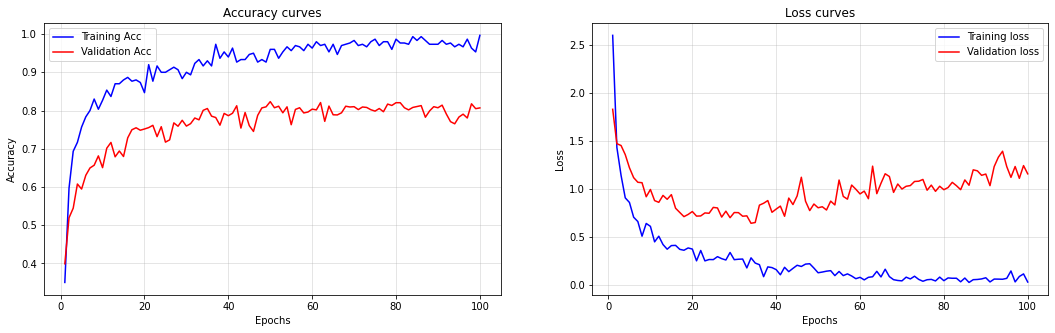

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# plot accuracy
acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(1, len(acc)+1)

ax = axes[0]
ax.plot(epochs, acc, 'b', label='Training Acc')
ax.plot(epochs, val_acc, 'r', label='Validation Acc')
ax.set_title('Accuracy curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.grid(alpha=0.4)
ax.legend()

# plot validation loss
loss = history['loss']
val_loss = history['val_loss']

ax = axes[1]
ax.plot(epochs, loss, 'b', label='Training loss')
ax.plot(epochs, val_loss, 'r', label='Validation loss')
ax.set_title('Loss curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(alpha=0.4)
ax.legend()

plt.show()

### Observations

These are the results of the enhanced architecture that was built using knowledge from previous experiments and by trial and error. The model was able to achieve an **accuracy of 0.82** three times during training, in epochs 62, 81, and 82. We did not stop training there by early stopping so as to be able to see the whole learning curves for 100 epochs. In fact, we can see the network starts to overfit a bit at epoch 40, approximately, since validation loss increases but training loss does not.

The architecture consists of two similar blocks formed by 2 convolutional layers followed by a batch norm and a (max) pooling layer. Then, after the flattening a dropout layer was also added, with 50% probability to drop weights - a value obtained by pure trial and error. Given that the convolutional layers use a ReLU activation, I specified the initialization of their weights to be a He normal distribution which is known to work well in practice with this kind of activations, and by trying I definitelly obtained better results with it. Padding was also added to those layers, in this case in order to prevent odd shapes in the inputs of the pooling layers that have stride=2.

Finally, this network was able to be built deeper because data was not only normalized but also augmented, and Adam was used as the optimizer (with default lr which worked well). We could also have tried to augment the data of some particular labels with other techniques such as flipping but that would have increased the complexity and memory requirements of the experiment as we would have had to pre-generate and save those instances apart. All in all I think an accuracy of 0.82 is pretty decent considering that the training set had only 300 images.

---